In [11]:
import xarray as xr
import dask
import dask.distributed as dd
import time
import numpy as np
import matplotlib.pyplot as plt

In [20]:
path = "/work/bb1170/RUN/b381737/software/flexpart_v10.4_3d7eebf/output/EI20091123-20091207/wu_setup/grid_time_20091207210000.nc"

In [46]:
%%time
data = xr.open_dataset(path, chunks=dict(time=5, pointspec=4))
arr = data.spec001_mr
#client.submit(arr[dict(pointspec=np.arange(36))].sum, "time")
x = arr[dict(pointspec=np.arange(36))].sum(dim="time")
x = x.persist()

CPU times: user 329 ms, sys: 14 ms, total: 343 ms
Wall time: 366 ms


In [9]:
x = np.arange(5)
y = np.arange(5,10,)
z = list(zip(x,y))

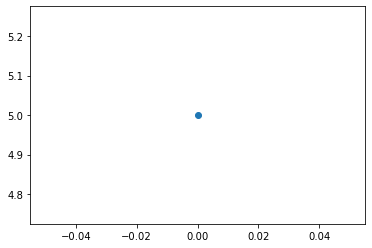

In [14]:
plt.scatter(*z[0])

In [22]:
%%time
data = xr.open_dataset(path, chunks=dict(time=15, pointspec=4))
arr = data.spec001_mr
arr[dict(pointspec=np.arange(36))].sum(dim="time").compute()

CPU times: user 1.33 s, sys: 318 ms, total: 1.65 s
Wall time: 22.1 s


<xarray.DataArray 'spec001_mr' (nageclass: 1, pointspec: 36, height: 1,
                                latitude: 360, longitude: 719)>
array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
...
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -178.8 -178.2 -177.8 ... 179.2 179.8 180.2
  * latitude   (latitude) float32 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * height     (height) float32 100.0
Dimensions without coordinates: nageclass, pointspec

In [5]:
%%time
arr

AttributeError: 'DataArray' object has no attribute 'visualize'

In [ ]:
%%time
data.groupby("time").sum(dim="time").compute()